In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Seed the random number generator
np.random.seed(0)

In [25]:
def traffic_ca(steps, size, rho):
    
    # Init x with size and time steps
    x = np.zeros((steps, size))
    
    # Set up x with initial cars
    x[0,:int(rho*size)] = 1
    np.random.shuffle(x[0,:])
    speeds = []
    
    # Set up lookup table
    lookup_table = [0, 0, 0, 1, 1, 1, 0, 1]
    
    # Step through all time steps and update elements
    for t in range(steps - 1):
        for j in range(size):
            left = (j - 1) % size
            right = (j + 1) % size
            n_state = 4 * x[t, left] + 2 * x[t, right]
            x[t+1, j] = lookup_table[int(n_state)]
            if (t > 50 and x[t,j] == 1):
                if (x[t+1, j] == 1):
                    speeds.append(0)
                else:
                    speeds.append(1)
    
    return x

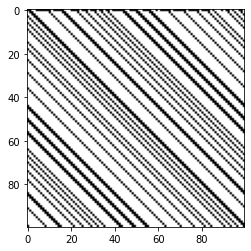

In [27]:
steps = 100
size = 100
rho = 0.7 # Density of cars

# Calculate x
x = traffic_ca(steps, size, rho)

# Plot it
plt.imshow(x, cmap='binary')
print(np.mean(speeds))

In [ ]:
all_speeds = []
rhos = sorted(np.random.random(100))

for rho in rhos:
    x, speed = traffic_ca(steps, size, rho)
    all_speeds.append(np.mean(speed))
    
plt.plot()